# Smart Credit Risk Analyzer using Explainable AI

### 1. Load the dataset

In [23]:
import pandas as pd

# Load the training data
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Documents\Bank_Personal_Loan_Modelling.csv")

# Show first few rows
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 2. Understand the structure of the dataset

In [24]:
# Shape and basic info
print(df.shape)
print(df.info())

# Check for null values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
ID                    0
Age             

## 3. Cleaning the dataset

#### 3.1 Drop irrelevant columns

In [25]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

#### 3.2 Handle Missinng Values

In [26]:
# Check if there any missig data
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### 3.3 check for duplicates

In [27]:
df.duplicated().sum()  # Should be 0 ideally

# If there are any
df.drop_duplicates(inplace=True)


In [28]:
# data type
df.dtypes  

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [29]:
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')


## 4. Exploratory Data Analysis(EDA)

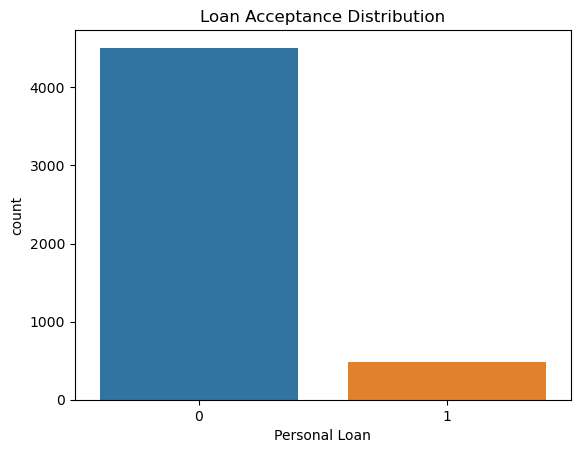

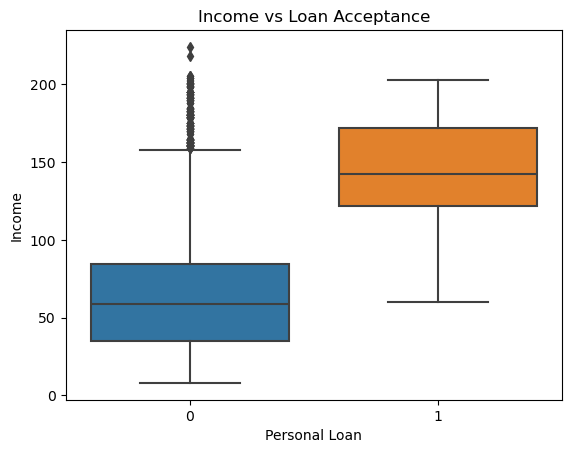

C:\Users\dell\anaconda3\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\dell\anaconda3\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


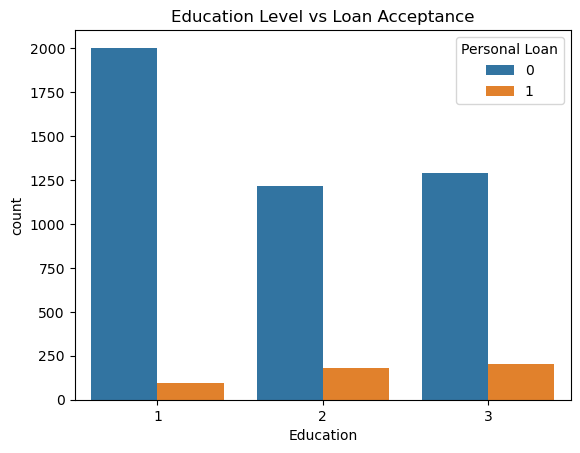

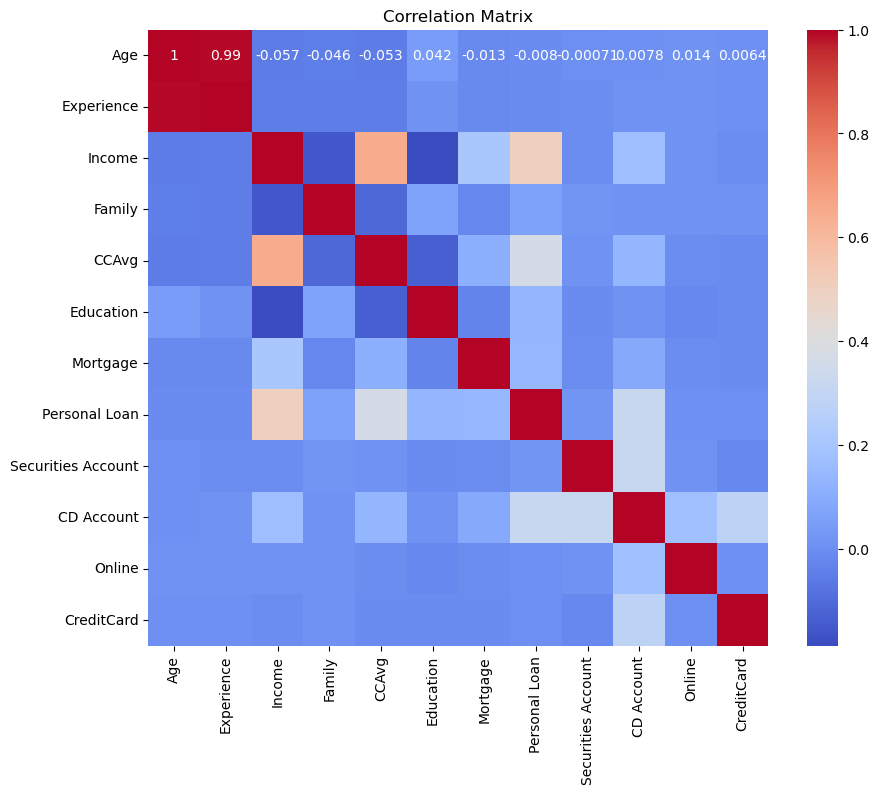

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of target variable (Personal Loan)
sns.countplot(x='Personal Loan', data=df)
plt.title('Loan Acceptance Distribution')
plt.show()

# 2. Income distribution by Loan acceptance
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.title('Income vs Loan Acceptance')
plt.show()

df['Personal Loan'] = df['Personal Loan'].astype(str)

# 3. Education level vs Loan acceptance
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.title('Education Level vs Loan Acceptance')
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 5. Splitting the data(Trai/Test)

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 6.Model Building(Logistic Regression)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9438877755511023

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       902
           1       0.73      0.66      0.69        96

    accuracy                           0.94       998
   macro avg       0.85      0.82      0.83       998
weighted avg       0.94      0.94      0.94       998


Confusion Matrix:
 [[879  23]
 [ 33  63]]


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9949899799599199


## 7. Explainable AI-Shap(SHapley Additive exPlanations)

Shape of SHAP values for class 1: (998, 11)


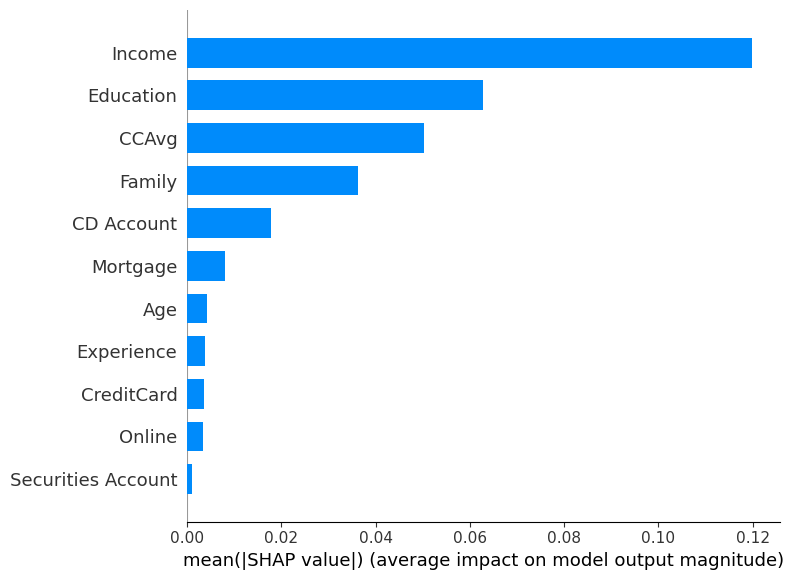

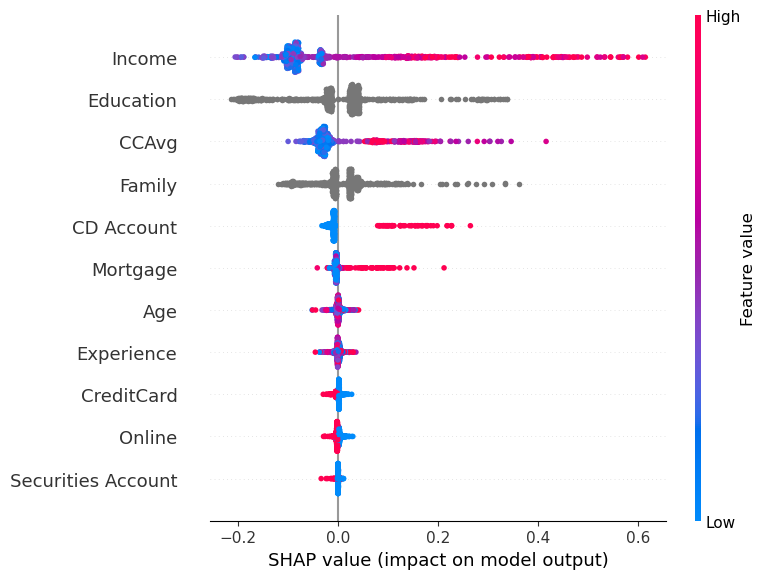

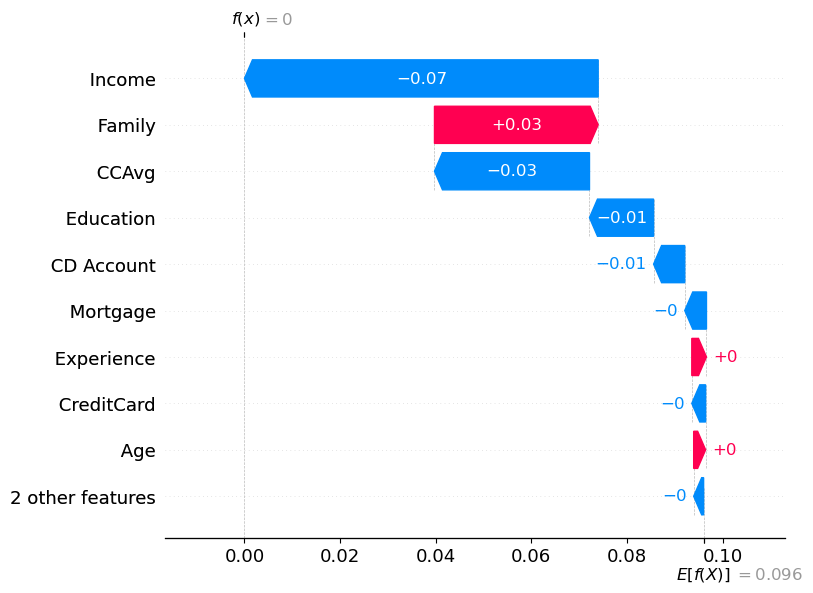

In [44]:
import shap
import pandas as pd
import numpy as np

# Convert test data to DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Use TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_df)

# Handle SHAP values shape:
# For binary classification with TreeExplainer, shap_values is often a list of two arrays:
# each array shape: (num_samples, num_features)
# But sometimes shap_values can be a numpy array with shape (num_samples, num_features, num_classes)
if isinstance(shap_values, list) and len(shap_values) == 2:
    # shap_values[0]: class 0, shap_values[1]: class 1
    shap_values_class1 = shap_values[1]
elif isinstance(shap_values, np.ndarray):
    # If 3D array, slice class 1 along last axis
    if shap_values.ndim == 3:
        shap_values_class1 = shap_values[:, :, 1]
    else:
        shap_values_class1 = shap_values
else:
    raise ValueError("Unexpected SHAP value format")

print(f"Shape of SHAP values for class 1: {shap_values_class1.shape}")  # should be (num_samples, num_features)

# Summary plot – bar chart of global feature importance
shap.summary_plot(shap_values_class1, X_test_df, plot_type="bar")

# Summary plot – beeswarm (detailed importance per sample)
shap.summary_plot(shap_values_class1, X_test_df)

# Waterfall plot for first sample
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],       # expected value for class 1
    shap_values_class1[0],             # SHAP values for first instance (1D array)
    X_test_df.iloc[0]                  # feature values for first instance
)

In [47]:
# Choose a sample index to explain
sample_index = 0

# Get the SHAP values, feature values, and feature names for this sample
vals = shap_values_class1[sample_index]           
data = X_test_df.iloc[sample_index].values        
features = X_test_df.columns.tolist()             

# Zip and sort by absolute SHAP impact
explanation = sorted(zip(features, data, vals), key=lambda x: abs(x[2]), reverse=True)

# Print top contributing features
print("\nTop Reasons for Loan Prediction (sample index: 0):")
for feat, val, impact in explanation[:5]:
    direction = "increased" if impact > 0 else "decreased"
    print(f"- {feat}: {val} → {direction} the prediction by {abs(impact):.3f}")



Top Reasons for Loan Prediction (sample index: 0):
- Income: 54.0 → decreased the prediction by 0.074
- Family: 4.0 → increased the prediction by 0.034
- CCAvg: 1.6 → decreased the prediction by 0.032
- Education: 1.0 → decreased the prediction by 0.013
- CD Account: 0.0 → decreased the prediction by 0.007
